### Model LDA dan Topik Detik 

In [1]:
import pandas as pd
import concurrent.futures
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Fungsi untuk menerapkan model LDA pada data yang telah diproses
def apply_lda(processed_texts):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(processed_texts)
    
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(X)
    
    return lda, vectorizer

# Fungsi untuk membuat word cloud
def create_wordcloud(lda_model, vectorizer):
    # Ambil 10 kata kunci dari setiap topik
    keywords_per_topic = 10
    topics_keywords = []
    for index, topic in enumerate(lda_model.components_):
        top_words_indices = topic.argsort()[-keywords_per_topic:]
        top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
        topics_keywords.append(top_words)
    
    # Gabungkan kata kunci dari semua topik menjadi satu teks
    all_keywords = ' '.join([word for sublist in topics_keywords for word in sublist])
    
    # Buat word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)
    
    # Tampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [3]:
df = pd.read_csv("grouped_news_detik_2023-10.csv")
print(len(df))


9636


In [4]:
df.head(10)

,url_berita,nama_berita,tanggal_berita,processed_text
0,https://20.detik.com/detikupdate/20231001-2310...,Detik News,2023-10-01,20detik rangkum jadi heboh tarik pek ya sim...
1,https://20.detik.com/detikupdate/20230831-2308...,Detik News,2023-10-09,remaja palestina umur 14 tembak mati polisi is...
2,https://20.detik.com/demi-indonesia/20231027-2...,Detik News,2023-10-27,menteri bumn erick thohir bicara bangsa indon...
3,https://20.detik.com/detikupdate/20231001-2310...,Detik News,2023-10-01,presiden joko widodo pimpin upacara ingat sakt...
4,https://20.detik.com/detikupdate/20231001-2310...,Detik News,2023-10-01,gempa kuat m 5 4 guncang sukabumi jawa barat ...
5,https://20.detik.com/detikupdate/20231001-2310...,Detik News,2023-10-01,menko polhukam mahfud md buka suara temu 12 s...
6,https://20.detik.com/detikupdate/20231001-2310...,Detik News,2023-10-01,tum pkb muhaimin iskandar cak imin bicara dug...
7,https://20.detik.com/detikupdate/20231001-2310...,Detik News,2023-10-01,ketua dpp pdip said abdullah ganjar pranowo ...
8,https://20.detik.com/detikupdate/20231001-2310...,Detik News,2023-10-01,presiden joko widodo pimpin upacara ingat sakt...
9,https://20.detik.com/demi-indonesia/20231027-2...,Detik News,2023-10-27,raih emas olimpiade tokyo greysia polii bicar...


In [5]:
df.dropna(subset=['processed_text'], inplace=True)

In [6]:
with concurrent.futures.ThreadPoolExecutor() as executor:
    lda_future = executor.submit(apply_lda, df['processed_text'])
    lda_model, vectorizer = lda_future.result()

In [7]:
print("Topik dari model LDA:")
for index, topic in enumerate(lda_model.components_):
    print(f"Topik {index+1}:")
    top_words_indices = topic.argsort()[-10:]  # Ubah menjadi 10 kata kunci per topik
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
    print(top_words)

Topik dari model LDA:
Topik 1:
['jalan', 'menteri', 'jaksa', 'negara', 'tni', 'indonesia', '10', 'rp', '2023', 'jakarta']
Topik 2:
['jalan', 'orang', 'warga', 'rumah', 'polisi', 'laku', 'video', '2023', '10', 'korban']
Topik 3:
['cawapres', 'ketua', '10', 'indonesia', 'partai', 'presiden', 'ganjar', 'jokowi', 'gibran', 'prabowo']
Topik 4:
['hukum', 'imin', 'konstitusi', 'cawapres', 'kpu', 'capres', '2023', 'usia', 'putus', 'mk']
Topik 5:
['menteri', 'palestina', 'orang', 'hamas', 'syl', '10', 'serang', 'gaza', 'kpk', 'israel']


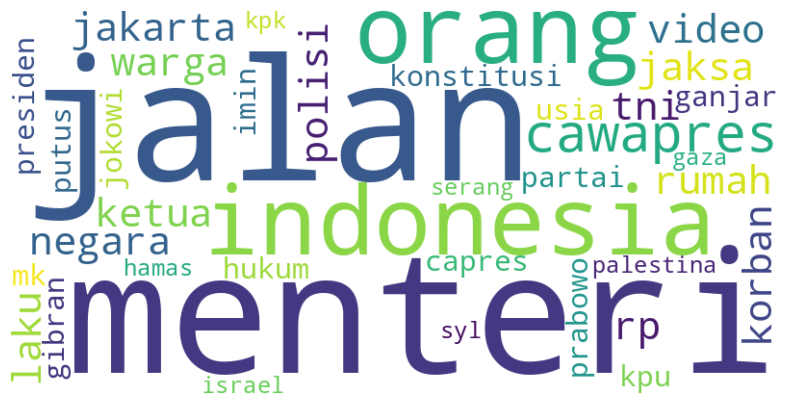

In [8]:
create_wordcloud(lda_model, vectorizer)